# Worksheet 13

Name:  Hemant Kumar Singh
UID: U17284611

### Topics

- Support Vector Machines

## Support Vector Machines

a) Follow along in class to implement the perceptron algorithm and create an animation of the algorithm.

In [1]:
import numpy as np
from PIL import Image as im
import matplotlib.pyplot as plt
import sklearn.datasets as datasets
import random

TEMPFILE = "temp.png"
CENTERS = [[0, 1], [1, 0]]

# Dataset
X, labels = datasets.make_blobs(n_samples=10, centers=CENTERS, cluster_std=0.2, random_state=0)
Y = np.array(list(map(lambda x : -1 if x == 0 else 1, labels.tolist())))

# Initializing w and b
w = np.array([1, 1])
b = 0.1

# Perceptron Parameters
epochs = 100
alpha = .05

def snap(x, w, b, error):
    """
        Plot the street induced by w and b.
        Circle the point x in red if it was
        misclassified or in yellow if it was
        classified correctly.
    """

    xplot = np.linspace(-3, 3)
    cs = np.array([x for x in 'gb'])

    svm = (-w[0] * xplot - b) / w[1]
    left_svm = (-w[0] * xplot - b - 1) / w[1]
    right_svm = (-w[0] * xplot - b + 1) / w[1]

    fig, ax = plt.subplots()
    ax.scatter(X[:,0],X[:,1],color=cs[labels].tolist(), s=50, alpha=0.8)
    if error:
        ax.add_patch(plt.Circle((x[0], x[1]), .2, color='r',fill=False))
    else:
        ax.add_patch(plt.Circle((x[0], x[1]), .2, color='y',fill=False))
    ax.plot(xplot, left_svm, 'g--', lw=2)
    ax.plot(xplot, svm, 'r-', lw=2)
    ax.plot(xplot, right_svm, 'b--', lw=2)
    ax.set_xlim(min(X[:, 0]) - 1, max(X[:,0]) + 1)
    ax.set_ylim(min(X[:, 1]) - 1, max(X[:,1]) + 1)
    fig.savefig(TEMPFILE)
    plt.close()

    return im.fromarray(np.asarray(im.open(TEMPFILE)).astype(np.uint8))


images = []
for _ in range(epochs):
    # pick a point from X at random
    i = random.randint(0, len(X) - 1)
    x, y = X[i], Y[i]
    error = False

    # Update w and b if misclassified
    if y * (np.dot(w, x) + b) <= 0:
        w = w + alpha * y * x
        b += alpha * y
        error = True

    images.append(snap(x, w, b, error))

images[0].save(
    'svm.gif',
    optimize=False,
    save_all=True,
    append_images=images[1:],
    loop=0,
    duration=100
)


b) Consider the following dataset:

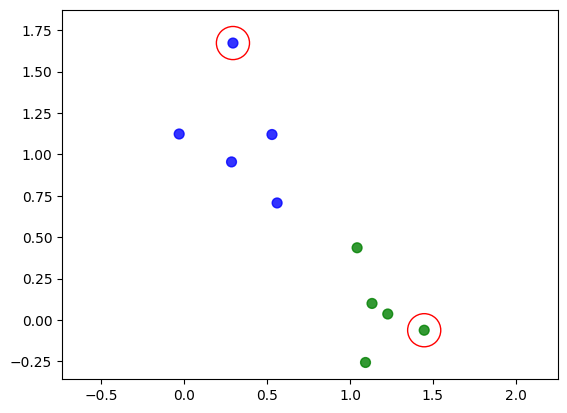

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import sklearn.datasets as datasets

centers = [[0, 1], [1, 0]]
X, _ = datasets.make_blobs(n_samples=10, centers=centers, cluster_std=0.3, random_state=0)
Y = np.array([1 if x[0] - x[1] >= 0 else 0 for x in X])

cs = np.array([x for x in 'bg'])
_, ax = plt.subplots()
ax.scatter(X[:,0],X[:,1],color=cs[Y].tolist(), s=50, alpha=0.8)
ax.set_aspect('equal', adjustable='datalim')
ax.add_patch(plt.Circle((X[0][0], X[0][1]), .1, color='r',fill=False))
ax.add_patch(plt.Circle((X[1][0], X[1][1]), .1, color='r',fill=False))
plt.show()

if we fit an SVM to the above dataset, moved the points circled in red, and re-fit the SVM, describe how the fit would change depending on how the points are moved.

Moving misclassified points closer to their correct class can improve model performance, while moving them further away can decrease the model's robustness. Moving them along the decision boundary may not significantly affect the boundary, unless they become support vectors.

c) If we were to fit an SVM to the above dataset, which points do you think would affect the decision boundary the most? Circle them in red.

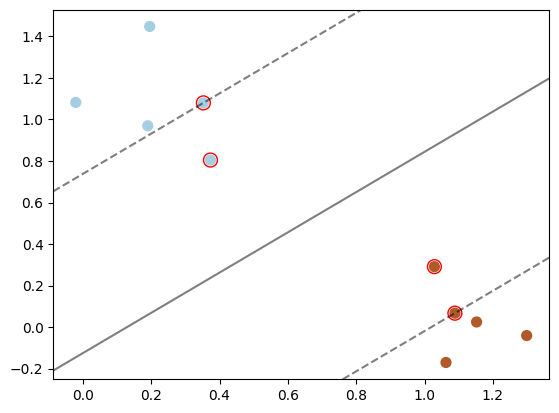

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.svm import SVC

# Dataset
CENTERS = [[0, 1], [1, 0]]
X, labels = datasets.make_blobs(n_samples=10, centers=CENTERS, cluster_std=0.2, random_state=0)

# Fit an SVM to the dataset
clf = SVC(kernel='linear', C=1)
clf.fit(X, labels)

def plot_decision_boundary(clf, X, y):
    fig, ax = plt.subplots()
    # Plot the data points
    ax.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Paired, s=50)

    # Plot the decision boundary
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()

    xx = np.linspace(xlim[0], xlim[1], 30)
    yy = np.linspace(ylim[0], ylim[1], 30)
    YY, XX = np.meshgrid(yy, xx)
    xy = np.vstack([XX.ravel(), YY.ravel()]).T
    Z = clf.decision_function(xy).reshape(XX.shape)

    ax.contour(XX, YY, Z, colors='k', levels=[-1, 0, 1], alpha=0.5, linestyles=['--', '-', '--'])

    # Circle the support vectors in red
    ax.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1], s=100, facecolors='none', edgecolors='r')

    plt.show()

plot_decision_boundary(clf, X, labels)


d) As we saw in class, the form
$$w^T x + b = 0$$
while simple, does not expose the inner product `<x_i, x_j>` which we know `w` depends on, having done the math. This is critical to applying the "kernel trick" which allows for learning non-linear decision boundaries. Let's modify the above algorithm to use the form
$$\sum_i \alpha_i <x_i, x> + b = 0$$

In [4]:
import numpy as np
from PIL import Image as im
import matplotlib.pyplot as plt
import sklearn.datasets as datasets

TEMPFILE = "temp.png"
CENTERS = [[0, 1], [1, 0]]

epochs = 100
learning_rate = .05

X, labels = datasets.make_blobs(n_samples=10, centers=CENTERS, cluster_std=0.2, random_state=0)
Y = np.array(list(map(lambda x : -1 if x == 0 else 1, labels.tolist())))

alpha_i = np.zeros((len(X),))
b = 0

def snap(x, alpha_i, b, error):
    ...
    return im.fromarray(np.asarray(im.open(TEMPFILE)).astype(np.uint8))

def predict_many(alpha_i, b, Z):
    res = []
    for i in range(len(Z)):
        res.append(predict(alpha_i, b, Z[i]))
    return np.array(res)

def predict(alpha_i, b, x):
    result = 0
    for i in range(len(alpha_i)):
        result += alpha_i[i] * Y[i] * np.dot(X[i], x)
    result += b
    return result

images = []
for _ in range(epochs):
    # pick a point from X at random
    i = np.random.randint(0, len(X))
    error = False
    x, y = X[i], Y[i]
    
    if y * predict(alpha_i, b, x) <= 0:
        alpha_i[i] += learning_rate
        b += learning_rate * y
        error = True
        
    images.append(snap(x, alpha_i, b, error))

images[0].save(
    'svm_dual.gif',
    optimize=False,
    save_all=True,
    append_images=images[1:],
    loop=0,
    duration=100
)


Write a configurable kernel function to apply in lieu of the dot product. Try it out on a dataset that is not linearly separable.

In [5]:
def polynomial(x_i, x_j, c, n):
    return (np.dot(x_i, x_j) + c) ** n

e) Assume we fit an SVM using a polynomial Kernel function and it seems to overfit the data. How would you adjust the tuning parameter `n` of the kernel function?

Overfitting in an SVM with a polynomial kernel function may be caused by a model that is too complex for the dataset. To address this, we can consider the following:

Decreasing the degree parameter n of the polynomial kernel function to reduce the model's complexity and make the decision boundary smoother.

Adjusting the scale parameter (γ) and shift parameter (r) to control the influence of the kernel function, and experimenting with different values of r to affect the shape of the decision boundary.

Regularizing the SVM by adjusting the regularization parameter C. Reducing C can increase the tolerance for misclassification and potentially reduce overfitting.

f) Assume we fit an SVM using a RBF Kernel function and it seems to underfit the data. How would you adjust the tuning parameter `sigma` of the kernel function?

The RBF kernel function is defined as:

K(x, y) = exp(-γ * ||x - y||^2)

When an SVM with an RBF kernel function underfits the data, it may be due to the model being too simple. To address this, consider the following:

Decreasing the value of sigma (or increasing gamma) to increase the influence of individual data points on the decision boundary, making it more flexible and capturing complex relationships between data points. Careful adjustment is required to avoid overfitting.

Adjusting the regularization parameter C to reduce underfitting by fitting the training data more closely. Increasing the value of C can help the model capture more complex relationships between data points.

g) Tune the parameter of a specific Kernel function, to fit an SVM (using your code above) to the following dataset:

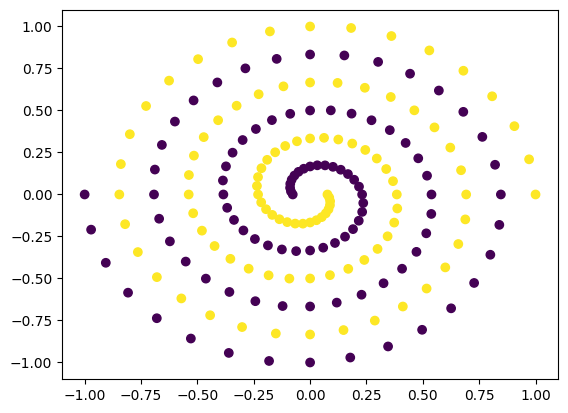

In [6]:
import numpy as np
import matplotlib.pyplot as plt

data = np.loadtxt("spiral.data")
x, y = data[:, :2], data[:, 2]

plt.scatter(x[:,0], x[:,1], c=y)